In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import iris data set

In [3]:
iris = sns.load_dataset('iris')

Exploratory Data Analysis

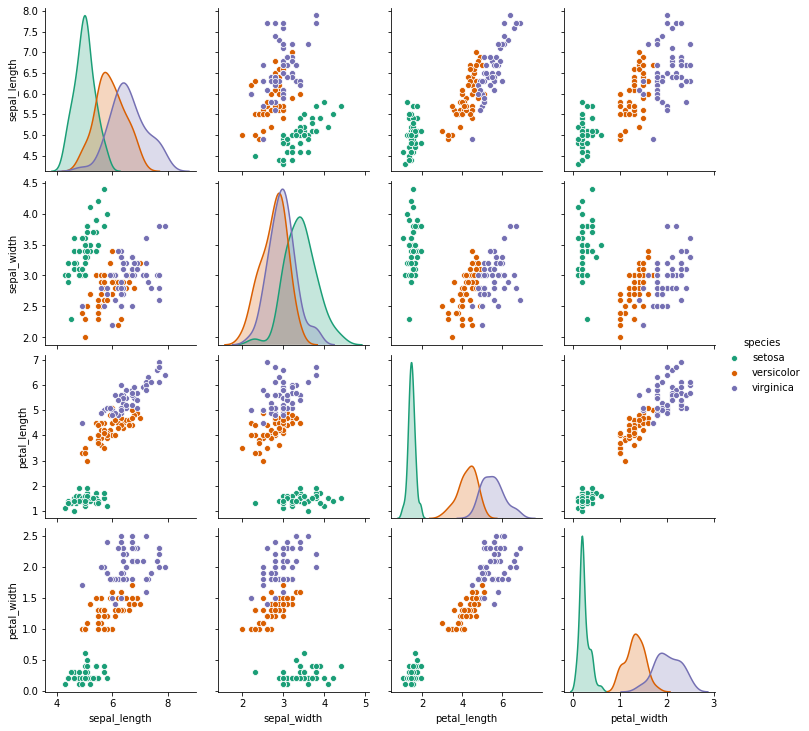

In [6]:
# pair plot of the dataset
# which species seems to be the most separable?
sns.pairplot(iris,hue='species',palette='Dark2')

setosa is the most separable of the three species

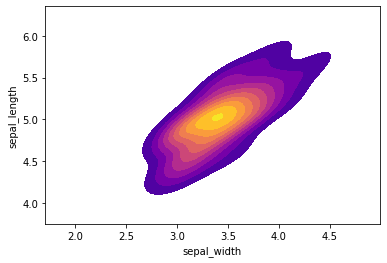

In [7]:
# kde plot of sepal_length versus sepal_width for setosa species
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)

# Train Test split

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Train model

In [13]:
from sklearn.svm import SVC
model = SVC()

In [14]:
model.fit(X_train,y_train)

SVC()

# Model Evaluation

In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 14  2]
 [ 0  0 15]]


In [18]:
print(classification_report(y_test,predictions))

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93        16
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Model is pretty good

lets see if we can improve it using gridsearch

# Gridsearch Practice

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [21]:
# creating gridsearch object and fitting training data
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

using the grid model to make some predictions

In [24]:
grid_predictions = grid.predict(X_test)

In [25]:
print(confusion_matrix(y_test,grid_predictions))

[[14  0  0]
 [ 0 14  2]
 [ 0  0 15]]


In [26]:
print(classification_report(y_test,grid_predictions))

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93        16
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

